<a href="https://colab.research.google.com/github/ajeet966/Machinelearning/blob/main/MOVIES_GENERIC_PREDICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOVIES_GENERIC_PREDICATION**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Inspect Data

In [20]:

data = pd.read_csv('/content/imdb_top_2000_movies.csv')
print(data.head())

              Movie Name Release Year  Duration  IMDB Rating  Metascore  \
0          The Godfather         1972       175          9.2      100.0   
1  The Godfather Part II         1974       202          9.0       90.0   
2        Ordinary People         1980       124          7.7       86.0   
3     Lawrence of Arabia         1962       218          8.3      100.0   
4             Straw Dogs         1971       113          7.4       73.0   

       Votes                        Genre              Director  \
0  2,002,655                 Crime, Drama  Francis Ford Coppola   
1  1,358,608                 Crime, Drama  Francis Ford Coppola   
2     56,476                        Drama        Robert Redford   
3    313,044  Adventure, Biography, Drama            David Lean   
4     64,331       Crime, Drama, Thriller         Sam Peckinpah   

                Cast     Gross  
0      Marlon Brando  $134.97M  
1          Al Pacino   $57.30M  
2  Donald Sutherland   $54.80M  
3      Peter O

In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Check for NaN values in y_train and y_test
print("NaN values in y_train:", y_train.isna().sum())
print("NaN values in y_test:", y_test.isna().sum())

NaN values in y_train: 62
NaN values in y_test: 19


In [23]:
# Remove rows with NaN values in y_train
non_nan_train_indices = y_train.dropna().index
X_train = X_train.loc[non_nan_train_indices]
y_train = y_train.dropna()

In [24]:
# Remove rows with NaN values in y_test
non_nan_test_indices = y_test.dropna().index
X_test = X_test.loc[non_nan_test_indices]
y_test = y_test.dropna()

# Transform Text Data using TF-IDF

In [25]:

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train and Evaluate Models

In [26]:

# Train and evaluate Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         6
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Train and evaluate Logistic Regression classifier

In [27]:

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
        38.0       0.07      0.17      0.10      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train and evaluate SVM classifier

In [28]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
        38.0       0.07      0.17      0.10   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Step 5: Save the Best Model and Vectorizer

In [29]:

best_model = svm_classifier
joblib.dump(best_model, 'movie_genre_predictor.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# Plot Actual vs Predicted Genres

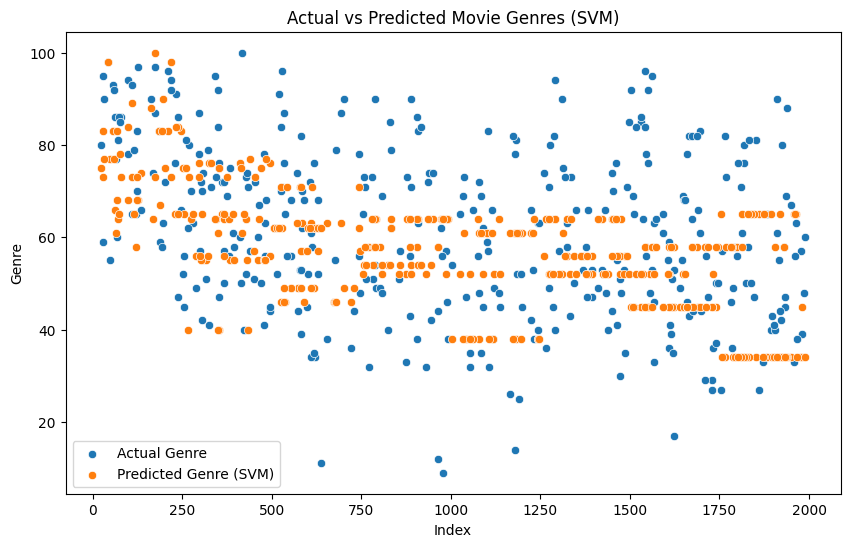

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual Genre')
sns.scatterplot(x=y_test.index, y=y_pred_svm, label='Predicted Genre (SVM)')
plt.title('Actual vs Predicted Movie Genres (SVM)')
plt.xlabel('Index')
plt.ylabel('Genre')
plt.legend()
plt.show()

In [31]:
# Load the saved model and vectorizer
loaded_model = joblib.load('movie_genre_predictor.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Predict the genre for a new plot summary
new_plot = ["A young boy discovers he has magical powers and attends a school for wizards."]
new_plot_tfidf = loaded_vectorizer.transform(new_plot)
predicted_genre = loaded_model.predict(new_plot_tfidf)

print(f"Predicted Genre: {predicted_genre[0]}")


Predicted Genre: 73.0
